In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

In [30]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_finalv2.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)

ValueError: max() arg is an empty sequence

we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 10.0 53.98446145045017
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 11.288378916846888 53.99075474925954
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 12.742749857031333 53.99684581488644
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 14.38449888287663 54.00268493406859
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 16.237767391887218 54.008234460510195
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 18.329807108324356 54.013468086002916
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 20.6913808111479 54.01836969758588
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 23.357214690901227 54.02293200464029
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 26.366508987303583 54.0271550825914
we get the values for scheme Req.Fth=0.7,Strg_Fth = 0.8 point 29.763514416313175 54.03104494114306
we get the values for sche

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


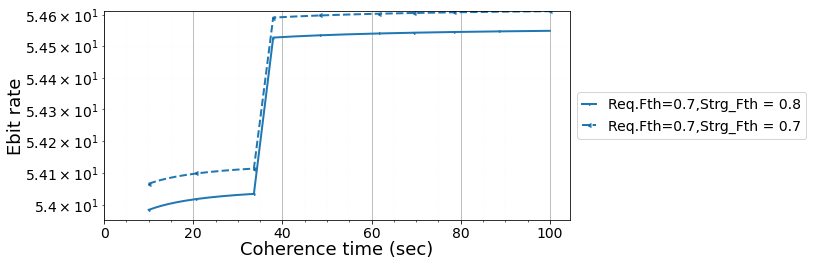

In [89]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
#         print("objective_value",objective_value)
        
        if  ( t_max in [10] and request_fidelity_threshold in [0.7]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9] and storage_block_threshold in [0.8,0.7] and 
             delta in [2] and edge_capacity in [600] and storage_capacity in [400]
            ):
            scheme = "Req.Fth="+str(request_fidelity_threshold)+",Strg_Fth = "+str(storage_block_threshold)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=[objective_value]
            
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Ebit rate",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,14,
                      "plots/QSN_repeater_chain_ebit_as_coh_time.pdf",True,2,11.4,3.8,True)

In [96]:
τ_coh_list = np.linspace(10,10,1)
print(τ_coh_list)

[10.]


we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 2 54.066485948036565
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 4 53.8267279327887
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 6 53.80298991528528
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 8 53.7950463016872
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 10 53.79052746155048
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 12 53.787514981025495
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 14 53.78536320922193
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 16 53.78374938036926
we get the values for scheme Strg_Fth = 0.7,τ_coh =10sec point 18 53.78249418015051
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 2 54.09861186918476
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 4 53.92031324316387
we get the values for scheme Strg_Fth = 0.7,τ_coh =20sec point 6 53.82314332159311

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


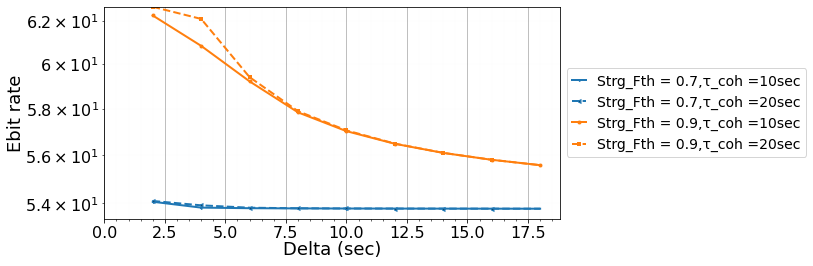

In [81]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = int(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [10] and request_fidelity_threshold in [0.7]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9] and storage_block_threshold in [0.9,0.7] and 
              edge_capacity in [600] and storage_capacity in [400] and τ_coh in [20.6913808111479,10.0]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][delta].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][delta]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][delta]=[objective_value]
            
         
            τ_coh_values.add(delta)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Delta (sec)","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,14,
                      "plots/QSN_repeater_chain_ebit_as_delta.pdf",True,2,11.4,3.8,True)

In [9]:
# plotting 3D Ebit rate as coherence and delta time

τ_coh_values  [1.0, 1.0256410256410255, 1.0344827586206897, 1.0512820512820513, 1.0689655172413792, 1.0769230769230769, 1.1025641025641026, 1.103448275862069, 1.1282051282051282, 1.1379310344827587, 1.1538461538461537, 1.1724137931034484, 1.1794871794871795, 1.205128205128205, 1.206896551724138, 1.2307692307692308, 1.2413793103448276, 1.2564102564102564, 1.2758620689655173, 1.282051282051282, 1.3076923076923077, 1.3103448275862069, 1.3333333333333333, 1.3448275862068966, 1.358974358974359, 1.3793103448275863, 1.3846153846153846, 1.4102564102564101, 1.4137931034482758, 1.435897435897436, 1.4482758620689655, 1.4615384615384615, 1.4827586206896552, 1.4871794871794872, 1.5128205128205128, 1.5172413793103448, 1.5384615384615383, 1.5517241379310345, 1.564102564102564, 1.5862068965517242, 1.5897435897435899, 1.6153846153846154, 1.6206896551724137, 1.641025641025641, 1.6551724137931034, 1.6666666666666665, 1.6896551724137931, 1.6923076923076923, 1.717948717948718, 1.7241379310344827, 1.7435897

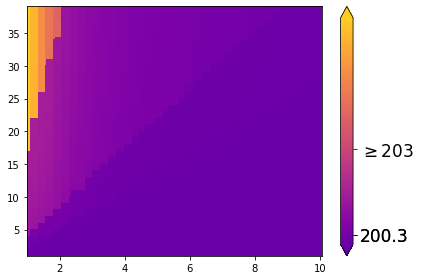

In [28]:
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

each_coh_delata_ebit  ={}
τ_coh_values = []
delta_values = []
            
with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        if  ( t_max in [20] and request_fidelity_threshold in [0.6]  and 
             storage_block_threshold in [0.7] and 
           τ_coh <40 and  delta < 10 and    edge_capacity in [200] and storage_capacity in [400]
            ):
            try:
                each_coh_delata_ebit[τ_coh,delta].append(objective_value)
            except:
                each_coh_delata_ebit[τ_coh,delta] = [objective_value]
                    
            if τ_coh not in τ_coh_values:
                τ_coh_values.append(τ_coh)
            if delta not in delta_values:
                delta_values.append(delta)

X = []
Y =[]
Z = []
rate_or_utility_values = []
τ_coh_values.sort()
delta_values.sort()
print("τ_coh_values ",τ_coh_values)
print("delta_values",delta_values)

for delta in delta_values:
    for τ_coh in τ_coh_values:
        if (τ_coh,delta) in each_coh_delata_ebit:
            ebits = each_coh_delata_ebit[τ_coh,delta]
            avg_ebits = sum(ebits)/len(ebits)
            X.append(delta)
            Y.append(τ_coh)
            Z.append(avg_ebits)

print("Z ",min(Z),sum(Z)/len(Z),max(Z))
plotting_2D("Delta","coherence time (ms)","Ebit rate",
                          10, 10, 10,
                          10, 0, 0,
                          0,0,
                          50,
                          X,Y,Z,200,200.3,203,
                          False,True,
                          False,1,
                          18,"plots/3D_delta_coherence_ebit_rate.pdf",
                          False,3,6,3.6)

In [19]:
import numpy as np
τ_coh_list = np.linspace(1,2,40)
print(τ_coh_list)

[1.         1.02564103 1.05128205 1.07692308 1.1025641  1.12820513
 1.15384615 1.17948718 1.20512821 1.23076923 1.25641026 1.28205128
 1.30769231 1.33333333 1.35897436 1.38461538 1.41025641 1.43589744
 1.46153846 1.48717949 1.51282051 1.53846154 1.56410256 1.58974359
 1.61538462 1.64102564 1.66666667 1.69230769 1.71794872 1.74358974
 1.76923077 1.79487179 1.82051282 1.84615385 1.87179487 1.8974359
 1.92307692 1.94871795 1.97435897 2.        ]
